In [344]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from copy import deepcopy

# Question 1

In [345]:
def get_memory_patterns_and_connections(N, P, f):
    patterns = (np.random.random((N, P)) < f).astype(int)
    matrix_f = patterns - f
    sum_matrix = matrix_f @ matrix_f.T
    np.fill_diagonal(sum_matrix, 0)
    connections = (1 / (f*(1-f))) * sum_matrix
    return patterns, connections


# Question 2

In [346]:
def get_update(J, s, j, T):
    return 1 if J[j] @ s - T > 0 else 0

def not_sync(J, s, T):
    copy_s = deepcopy(s)
    while True:
        prev_s = deepcopy(copy_s)
        for i in range(J.shape[0]):
            copy_s[i] = get_update(J, copy_s, i, T)
        if np.all(copy_s == prev_s):
            return copy_s


# Question 3

In [347]:
def get_stabitility(J, s, T):
    new_s = not_sync(J, s, T)
    c = 0
    for i in range(len(s)):
        if np.any(s[i] != new_s[i]):
            c += 1
    return c / len(s)

# Question 4

In [348]:
def experiment(f, a, N=1000):
    patterns, connections = get_memory_patterns_and_connections(
        N, math.ceil(N * a), f)
    return get_stabitility(connections, patterns[:, 0], 0.5 - f)

# Question 5

In [349]:
alpha = np.repeat(np.arange(0.02,0.82,step=0.02), 5)
n = np.repeat(1000, len(alpha))
df_01 = pd.DataFrame({"alpha":alpha})
df_02 = pd.DataFrame({"alpha":alpha})
df_03 = pd.DataFrame({"alpha":alpha})

## When f = 0.1

In [335]:
df_01['error'] = df_01.apply(lambda row:
                               experiment(0.1, row['alpha']),
                               axis=1)

In [336]:
df_mean_results_01 = df_01.groupby(by="alpha").mean()

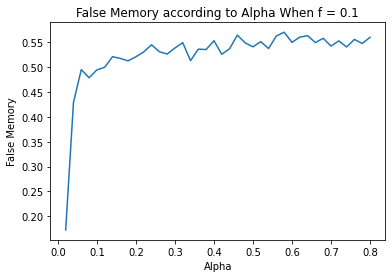

In [337]:
plt.plot(df_mean_results_01)
plt.title("False Memory according to Alpha When f = 0.1")
plt.xlabel("Alpha")
plt.ylabel("False Memory")
plt.show()

## When f = 0.2

In [338]:
df_02['error'] = df_02.apply(lambda row:
                               experiment(0.2, row['alpha']),
                               axis=1)

In [339]:
df_mean_results_02 = df_02.groupby(by="alpha").mean()

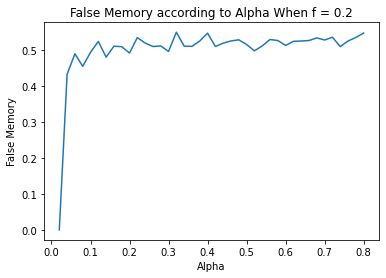

In [340]:
plt.plot(df_mean_results_02)
plt.title("False Memory according to Alpha When f = 0.2")
plt.xlabel("Alpha")
plt.ylabel("False Memory")
plt.show()

## When f = 0.3

In [341]:
df_03['error'] = df_03.apply(lambda row:
                               experiment(0.3, row['alpha']),
                               axis=1)


In [342]:
df_mean_results_03 = df_03.groupby(by="alpha").mean()

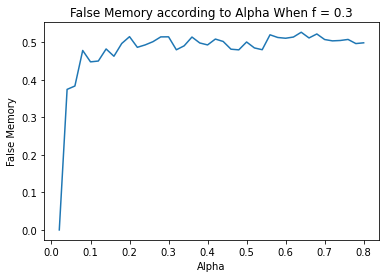

In [343]:
plt.plot(df_mean_results_03)
plt.title("False Memory according to Alpha When f = 0.3")
plt.xlabel("Alpha")
plt.ylabel("False Memory")
plt.show()